<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-анализ-исходных-данных" data-toc-modified-id="Загрузка-и-анализ-исходных-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и анализ исходных данных</a></span><ul class="toc-item"><li><span><a href="#Проведем--EDA-(exploratory-data-analysis)" data-toc-modified-id="Проведем--EDA-(exploratory-data-analysis)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проведем  EDA (exploratory data analysis)</a></span></li><li><span><a href="#Вывод--(exploratory-data-analysis)" data-toc-modified-id="Вывод--(exploratory-data-analysis)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод  (exploratory data analysis)</a></span></li></ul></li><li><span><a href="#Построение-модели" data-toc-modified-id="Построение-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Построение модели</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-для-модели" data-toc-modified-id="Подготовка-данных-для-модели-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных для модели</a></span></li><li><span><a href="#Построение-модели-&quot;Решающее-древо&quot;" data-toc-modified-id="Построение-модели-&quot;Решающее-древо&quot;-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Построение модели "Решающее древо"</a></span></li><li><span><a href="#Построение-модели-&quot;Случайный-лес&quot;" data-toc-modified-id="Построение-модели-&quot;Случайный-лес&quot;-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Построение модели "Случайный лес"</a></span></li><li><span><a href="#Построение-модели-&quot;Логистическая-регрессия&quot;" data-toc-modified-id="Построение-модели-&quot;Логистическая-регрессия&quot;-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Построение модели "Логистическая регрессия"</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов



**Задача:**

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.
Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.
Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.


**Цель** - построить модель которая прогназирует уход клиента из банка. Модель считается эффективной если метрика F1 рана 0.59 или больше.

**Задачи:**

1. Исследовать данные.
2. Разделить исходные данные на обучающие, валидационные и тестовые.
2. Построить модель "Решающее дерево"
3. Построить модель "Случайный лес"
4. Построить модель "Логистическая регрессия"
5. На основании метрики качества F1 выбрать наилучшую модель

## Загрузка и анализ исходных данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

In [2]:
# создадим DataFrame
try:
    df = pd.read_csv('Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')

Посмотрим на данные в таблице

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Таблица состоит из 14 столбцов и 1000 строк. 

Мне не нравится названия столбцов:

во первых избавимся от верхнего регистра в столбцах;

во вторых избавимся от верхнего регистра в названиях самих столбцов, запишем их через нижний слеш.

In [6]:
df.columns = ['Row_Number', 'Customer_Id', 'Surname', 'Credit_Score', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'Num_Of_Products', 'Has_Cr_Card',
       'Is_Active_Member', 'Estimated_Salary', 'Exited']

In [7]:
df.columns = map(str.lower, df.columns)

### Проведем  EDA (exploratory data analysis)

Проверим данные на наличие дубликатов

In [8]:
df.duplicated().sum()

0

Дубликатов нет.

Проверим данные на наличие пропущенных значений

In [9]:
df.isna().mean()

row_number          0.0000
customer_id         0.0000
surname             0.0000
credit_score        0.0000
geography           0.0000
gender              0.0000
age                 0.0000
tenure              0.0909
balance             0.0000
num_of_products     0.0000
has_cr_card         0.0000
is_active_member    0.0000
estimated_salary    0.0000
exited              0.0000
dtype: float64

Есть пропущенные значения в столбце tenure(сколько лет человек является клиентом банка). Рассмотрим их более подробно. Сгруппируем по tenure и exited посмотрим на общее количество и среднее значение, сделаю сортировку по среднему значению.

In [10]:
df.groupby('tenure', dropna=False)['exited'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
tenure,,
0.0,382,0.235602
1.0,952,0.223739
9.0,882,0.219955
3.0,928,0.213362
4.0,885,0.207910
10.0,446,0.206278
5.0,927,0.201726
NaN,909,0.201320
6.0,881,0.200908


Для большей наглядности построю график зависимости.

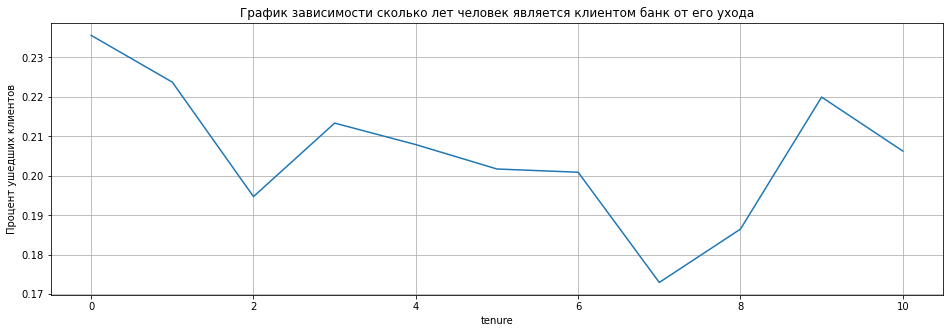

In [11]:
plt.figure(figsize=(16,5))
plt.title("График зависимости сколько лет человек является клиентом банк от его ухода")
plt.ylabel("Процент ушедших клиентов")
df.groupby('tenure', dropna=False)['exited'].mean().plot();
plt.grid()

Из графика видно, что больше всего клиентов уходит в первый год более 23 процентов, потом идет на спад, но со второго по третий год мы наблюдаем рост. С четвертого года мы видим спад, с седьмого года мы наблюдаем опять рост.

Сначала я подумал, что в пропущенных значениях в столбце tenure находятся люди которые, являются клиентами банка меньше года, но нет для таких клиентов есть значение "0.0", может это клиенты которые ушли, но тогда не понятно, почему у них есть кредитные карты и в столбце is_active_member есть единицы, значит они активны.

In [12]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        9091 non-null   int64  
 1   customer_id       9091 non-null   int64  
 2   surname           9091 non-null   object 
 3   credit_score      9091 non-null   int64  
 4   geography         9091 non-null   object 
 5   gender            9091 non-null   object 
 6   age               9091 non-null   int64  
 7   tenure            9091 non-null   float64
 8   balance           9091 non-null   float64
 9   num_of_products   9091 non-null   int64  
 10  has_cr_card       9091 non-null   int64  
 11  is_active_member  9091 non-null   int64  
 12  estimated_salary  9091 non-null   float64
 13  exited            9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


Посмотрим географию клиентов

In [13]:
df.groupby('geography', dropna=False)['exited'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
geography,,
Germany,2293,0.327519
Spain,2248,0.164591
France,4550,0.161099


Больше всего клиентов уходит из Германии на втором месте Испания, и на третьем Франция.

Посмотрим как факт ухода клиента зависит от пола

In [14]:
df.groupby('gender', dropna=False)['exited'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
gender,,
Female,4117,0.252854
Male,4974,0.163450


Женщины уходят в два раза чаще чем мужчины.

Посмотрим на возраст

In [15]:
df['age'].agg(['min', 'max'])

min    18
max    92
Name: age, dtype: int64

Самому молодому клиенту - 18 лет, самом пожилому клиенту 92

Для лучшего анализа, я разобью сет на бины, предварительно создав его копию и работая с ней, что-бы не портить основные данные.

In [16]:
#назову его df_w
df_w = df.copy()

In [17]:
df_w['age_bin'] = pd.qcut(df_w['age'], 5)

In [18]:
df_w.groupby('age_bin', 
           dropna=False)['exited'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
age_bin,,
"(46.0, 92.0]",1726,0.457126
"(40.0, 46.0]",1553,0.285254
"(35.0, 40.0]",2030,0.149261
"(31.0, 35.0]",1620,0.093827
"(17.999, 31.0]",2162,0.077243


Посмотрим на графическую зависимость

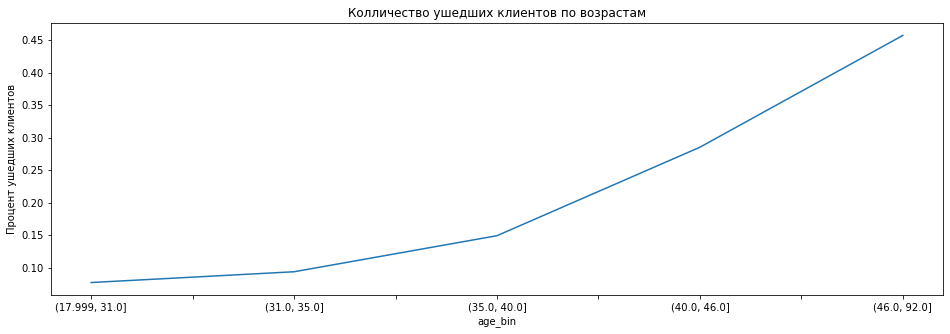

In [19]:
plt.figure(figsize=(16,5))
plt.title("Колличество ушедших клиентов по возрастам")
plt.ylabel("Процент ушедших клиентов")
df_w.groupby('age_bin', dropna=False)['exited'].mean().plot();

Из графика видно, что чем больше возраст клиента, тем чаще они уходят из банка.

Посмотрим на столбце **surname**

In [20]:
df.groupby('surname')['exited'].agg(['count', 'mean']).sort_values('count', ascending=False).head(5)

,count,mean
surname,,
Smith,30,0.300000
Martin,27,0.333333
Scott,26,0.115385
Genovese,25,0.160000
Yeh,25,0.120000


Всего 2932 уникальных значений, Smith, Martin, Scott самые популярный фамилии.

Посмотрим на столбец  **credit_score**

In [21]:
df.groupby('credit_score')['exited'].agg(['count', 'mean']).sort_values('mean', ascending=True)

,count,mean
credit_score,,
522,8,0.0
808,6,0.0
426,2,0.0
427,6,0.0
429,4,0.0
...,...,...
373,1,1.0
386,1,1.0
383,1,1.0


Тут видимо каждому клиенту присваивается какой-то номер - кредитный рейтинг, всего их 460.

Посмотрим на столбец **Balance**

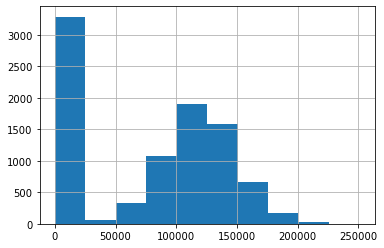

In [22]:
df['balance'].hist();

Для лучшего анализа, так-же разобью сет на бины, работаю с копией.

In [23]:
df_w['balance_bin'] = pd.qcut(df_w['balance'], 10, duplicates='drop')

In [24]:
df_w.groupby('balance_bin')['exited'].agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
balance_bin,,
"(110148.49, 121898.82]",909,0.291529
"(97318.25, 110148.49]",909,0.250825
"(121898.82, 133656.91]",909,0.246425
"(133656.91, 149218.39]",909,0.236524
"(149218.39, 250898.09]",909,0.222222
"(73309.38, 97318.25]",909,0.199120
"(-0.001, 73309.38]",3637,0.148199


Посмотрим на графическую зависимость

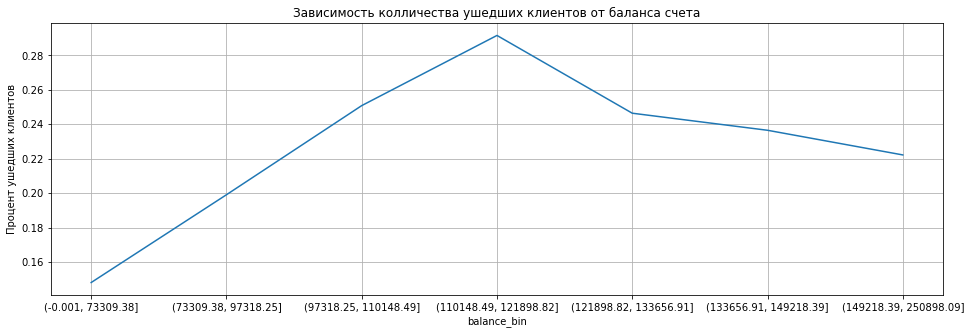

In [25]:
plt.figure(figsize=(16,5))
plt.title("Зависимость колличества ушедших клиентов от баланса счета")
plt.ylabel("Процент ушедших клиентов")
df_w.groupby('balance_bin', dropna=False)['exited'].mean().plot();
plt.grid()

Если на счете до 110138.926 то клиенты уходят, начиная с суммы 133710.358 и больше количество  ушедших клиентов уменьшается.

Посмотрим на столбец **Num_Of_Products**

In [26]:
df.groupby('num_of_products', 
           dropna=False)['exited'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
num_of_products,,
4,56,1.000000
3,234,0.824786
1,4617,0.277886
2,4184,0.076960


Видно что больше всего клиентов пользуется одним или двумя продуктами, тем кто пользуется одним продуктом уходят в четыре раза чаще, чем те кто пользуется двумя, те кто пользуется 3 продуктами 80 процентов из них уходя, те кто 4 все 100.

Посмотрим на столбец **has_cr_card**

In [27]:
df.groupby('has_cr_card', 
           dropna=False)['exited'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
has_cr_card,,
0,2682,0.207308
1,6409,0.202528


Количество клиентов используемых кредитную карту почти в два раза больше. 
Клиенты уходят одинаково, что он имеет кредитную карту, что нет.

Посмотрим на столбец **is_active_member**

In [28]:
df.groupby('is_active_member', 
           dropna=False)['exited'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
is_active_member,,
0,4404,0.268392
1,4687,0.143375


Из данных видно, что неактивные клиенты уходят в два раза чаще чем активные.

Посмотрим на столбец **EstimatedSalary**

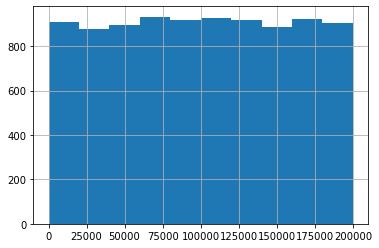

In [29]:
df['estimated_salary'].hist();

In [30]:
df_w['estimated_salary_bin'] = pd.qcut(df_w['estimated_salary'], 10, duplicates='drop')

In [31]:
df_w.groupby('estimated_salary_bin')['exited'].agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
estimated_salary_bin,,
"(160162.42, 179843.33]",909,0.223322
"(139712.81, 160162.42]",909,0.213421
"(179843.33, 199992.48]",909,0.212321
"(100240.2, 119882.86]",909,0.206821
"(40855.79, 60894.26]",909,0.201320
"(11.579, 20008.46]",910,0.201099
"(60894.26, 80428.42]",909,0.198020
"(80428.42, 100240.2]",909,0.195820
"(119882.86, 139712.81]",909,0.195820


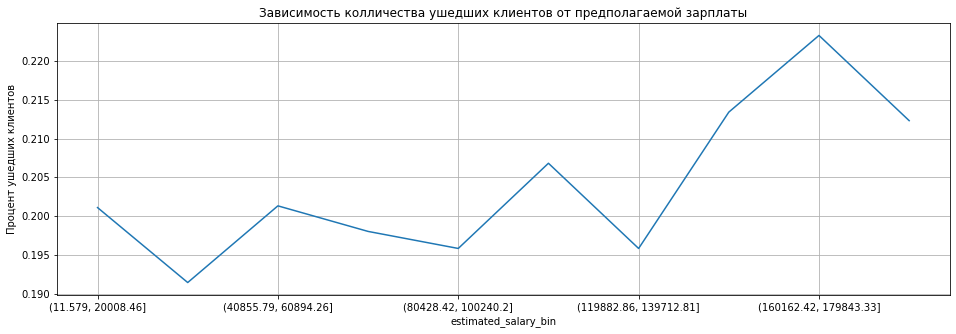

In [32]:
plt.figure(figsize=(16,5))
plt.title("Зависимость колличества ушедших клиентов от предполагаемой зарплаты")
plt.ylabel("Процент ушедших клиентов")
df_w.groupby('estimated_salary_bin', dropna=False)['exited'].mean().plot();
plt.grid()

Уход клиента слабо зависит от  предполагаемой зарплаты 

Посмотрим на общую картину распределения величин в DataFrime

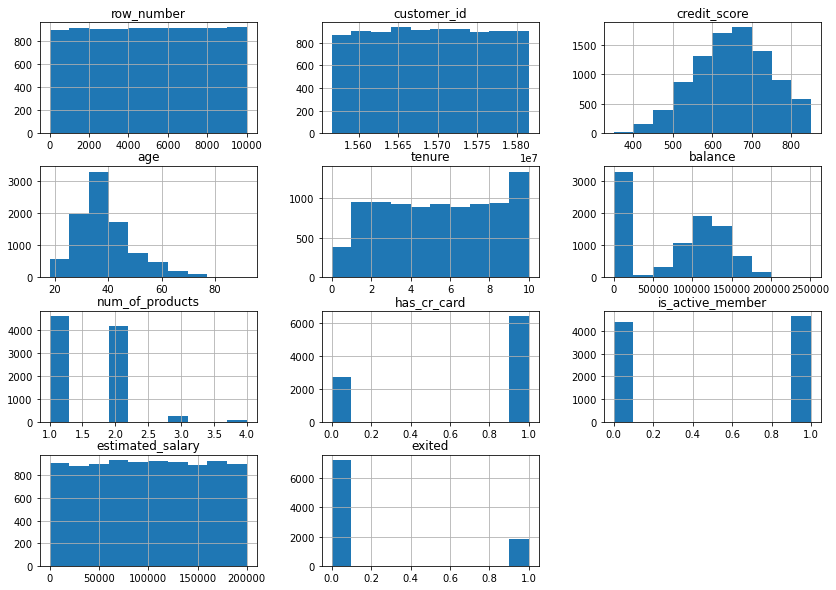

In [33]:
df.hist(column=df.columns, figsize=(14, 10));

Посмотрим как коррелируют между собой данны.

In [34]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_40518/3129850035.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
row_number,1.00,0.00,0.00,0.00,-0.01,-0.01,0.01,0.00,0.01,-0.00,-0.01
customer_id,0.00,1.00,-0.00,0.01,-0.02,-0.01,0.01,-0.02,0.00,0.01,-0.01
credit_score,0.00,-0.00,1.00,-0.00,-0.00,0.00,0.01,-0.00,0.03,0.01,-0.02
age,0.00,0.01,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.08,-0.01,0.28
tenure,-0.01,-0.02,-0.00,-0.01,1.00,-0.01,0.01,0.03,-0.03,0.01,-0.02
balance,-0.01,-0.01,0.00,0.03,-0.01,1.00,-0.30,-0.02,-0.00,0.01,0.12
num_of_products,0.01,0.01,0.01,-0.03,0.01,-0.30,1.00,0.01,0.01,0.01,-0.05
has_cr_card,0.00,-0.02,-0.00,-0.01,0.03,-0.02,0.01,1.00,-0.01,-0.01,-0.01
is_active_member,0.01,0.00,0.03,0.08,-0.03,-0.00,0.01,-0.01,1.00,-0.02,-0.16
estimated_salary,-0.00,0.01,0.01,-0.01,0.01,0.01,0.01,-0.01,-0.02,1.00,0.02


И посмотрим на наш целевой признак

<AxesSubplot:>

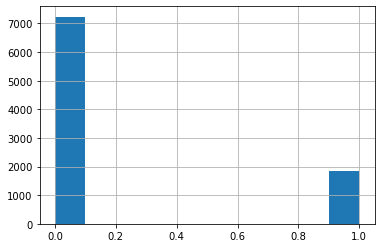

In [35]:
df['exited'].hist()

In [36]:
df['exited'].mean()

0.2039379606203938

Баланс классов - 0.2, то-есть 20% единиц, 80% нулей - тоесть наш таргет несбалансирован. 

### Вывод  (exploratory data analysis)

1. Имеем данные стоящие из 10000 строк и 14 столбцов.

2. **Признаки числовые** - row_number, customer_id, credit_score, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary.

3. **Признаки категориальные** - surname, geography, gender.

4. **Таргет exited** - несбалансирован. При отладки модели необходимо настроить порог predict. Порог по умолчанию он равен 0,5, его необходимо изменить.

5. В столбце Tenure **пропущенные значения** заменил медианными данными.

6. Наблюдается слабая корреляция между данными, построение модели будет чуть чуть затруднено.

## Построение модели

### Подготовка данных для модели

Преобразуем в столбцах **'geography'** и  **'geography'** категориальные признаки в численные с помощью техники прямого кодирования, или отображения (One-Hot Encoding)

In [37]:
df = pd.get_dummies(df, columns=["geography", "gender", "tenure"], prefix=["geography", "gender", "tenure"], drop_first=True)

Разделим переменные на независимые и целевые. 

**Целевая перемнная** (таргет) - столбец exited.

**Признаки** (фичи) - все столбцы кроме столбца exited (это таргет), столбца surname (следуя логики фамилия человека не может указать нам на то уйдет ли клиент из банка или нет.

In [38]:
target = df['exited']
features = df.drop( ['exited', 'surname', 'row_number', 'customer_id'], axis=1)

Разделим выборку на тестовую и обучающею. Сделаем стратификацию.

In [39]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345, stratify=df['exited'])

Проверим что разделение выполнено правильно.

In [40]:
features_train.shape

(6818, 20)

Отмасштабируем численные признаки.

In [41]:
numeric = ['credit_score', 'age', 'balance', 'num_of_products', 'estimated_salary']

In [42]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None

/home/vic/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/home/vic/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Приступим к построению модели

### Построение модели "Решающее древо"

Установим значение параметров:


<b>max_depth</b> - глубина дерева, будет измерятся от 1 до 30 с шагом равным 2.


In [43]:
parametrs = {'max_depth': range(1, 30, 2)}

Выберем модель DecisionTreeClassifier и с помощью GridSearchCV найдем оптимальные параметры модели на тренировочной выборке. 

In [44]:
model = DecisionTreeClassifier(random_state=12345)
grid = GridSearchCV(model, parametrs, cv=5)

In [45]:
%%time
grid.fit(features_train, target_train)

CPU times: user 2.57 s, sys: 6.32 ms, total: 2.57 s
Wall time: 2.59 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12345),
             param_grid={'max_depth': range(1, 30, 2)})

Лучшею модель запишем в best_model_tree

In [46]:
best_model_tree_no_balance = grid.best_estimator_

Посмотри как работате модель, если не учитивается баланс классов 

In [47]:
predictions = best_model_tree_no_balance.predict(features_test)

In [48]:
result = f1_score(target_test, predictions)
result

0.5601092896174864

In [49]:
probabilities = (best_model_tree_no_balance.predict_proba(features_test)[:,1])
fpr_tree, tpr_tree, thresholds = roc_curve(target_test, probabilities)
auc_roc = roc_auc_score(target_test, probabilities)
auc_roc

0.8434962400640477

Посмотрим на сбалансированную выборку. Выборку сбалансирую с помощью class_weight='balanced' 

In [50]:
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
grid = GridSearchCV(model, parametrs, cv=5)

In [51]:
%%time
grid.fit(features_train, target_train)

CPU times: user 2.65 s, sys: 5.98 ms, total: 2.65 s
Wall time: 2.67 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=12345),
             param_grid={'max_depth': range(1, 30, 2)})

In [52]:
best_model_tree_cl = grid.best_estimator_

In [53]:
predictions = best_model_tree_cl.predict(features_test)

In [54]:
result = f1_score(target_test, predictions)
result

0.5444915254237288

In [55]:
probabilities = best_model_tree_cl.predict_proba(features_test)[:,1]
fpr_tree_, tpr_tree_, thresholds_ = roc_curve(target_test, probabilities)
auc_roc = roc_auc_score(target_test, probabilities)
auc_roc

0.7152086788280818

 На сбалансированной выборке мы получили f1_score равный 0.54, auc_roc равный 0.71

Как мы выяснили ранее в нашей выборке отрицательны ответов 80% , положитительных 20%.
Нам необходмо увеличить количество положительных ответов в 4 раза для достижения баланса.
    
 Попробую сбалансировать выборку с помощью  функции upsample() с тремя параметрами: features — признаки, target — целевой признак, repeat — количество повторений. Функция вернёт признаки и целевой признак после операции upsampling.

In [56]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [57]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)

Проверим что все ок

In [58]:
target_train_upsampled.value_counts(normalize = 1)

1    0.506007
0    0.493993
Name: exited, dtype: float64

In [59]:
model = DecisionTreeClassifier(random_state=12345)
grid = GridSearchCV(model, parametrs, cv=5)

In [60]:
%%time
grid.fit(features_train_upsampled, target_train_upsampled)

CPU times: user 3.55 s, sys: 2.93 ms, total: 3.55 s
Wall time: 3.57 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12345),
             param_grid={'max_depth': range(1, 30, 2)})

In [61]:
best_model_tree_upsampled = grid.best_estimator_
predictions = best_model_tree_upsampled.predict(features_test)
result = f1_score(target_test, predictions)
result

0.5181236673773987

In [62]:
probabilities = best_model_tree_upsampled.predict_proba(features_test)[:,1]
fpr_tree_, tpr_tree_, thresholds_ = roc_curve(target_test, probabilities)
auc_roc = roc_auc_score(target_test, probabilities)
auc_roc

0.6978684165379997

А методом upsample мы получили  f1_score равный 0.51, auc_roc равный 0.69. 

Построим ROC кривую для сбалансированной и несбалансированной выборки

Посмотри как работате модель, если не учитивается баланс классов

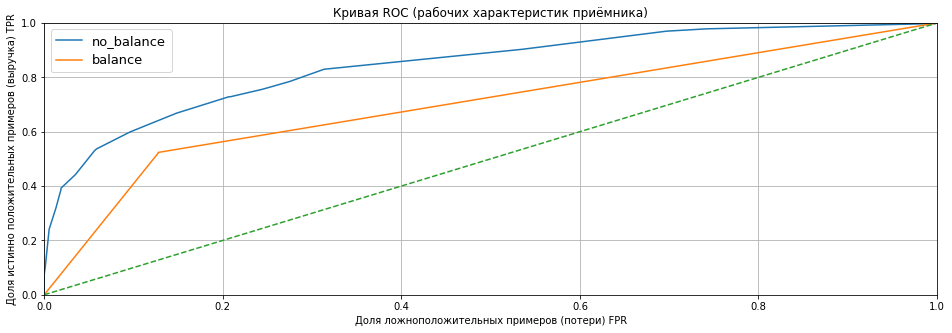

In [63]:
plt.figure(figsize=(16,5))
plt.plot(fpr_tree, tpr_tree, label="no_balance")
plt.plot(fpr_tree_, tpr_tree_, label="balance")
plt.title("Кривая ROC (рабочих характеристик приёмника)")
plt.ylabel("Доля истинно положительных примеров (выручка) TPR")
plt.xlabel("Доля ложноположительных примеров (потери) FPR")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(fontsize = 13)
plt.grid()
plt.show()

Нам нужна точка где FPR(потери) стали минимальным при самом возможном высоком FPR - нам нужна точка излома.

Вывод:

   Если данные несбалансированны, то нам трудно найти точку где FPR(потери) стали минимальным при самом возможном высоком FPR - нам нужна точка излома графика, а на несбалансированных данных ее увидить и определить трудно.
    
   На сбалансированных данных auc_roc (показатель который определяет способность модели различать классы - площадь под кривой) меньше чем на несбалансированных.
    
   Необходимо выбирать чем жертвовать или показателем f1 что мало вероятно или показателем auc_roc.
    

### Построение модели "Случайный лес"

Установим значение параметров:

<b>n_estimators</b> - число деревьев в лесу, оно будет измеряться от значения по дефолту раное 10 до 50 с шагом 10.

<b>max_depth</b> - глубина дерева, будет измерятся от 1 до 30 с шагом равным 2.

In [64]:
parametrs = {'n_estimators': range(10, 51, 10),
            'max_depth': range(1, 30, 2)}

Выберем модель RandomForestClassifier и с помощью GridSearchCV найдем оптимальные параметры модели на тренировочной выборке. 

In [65]:
model = RandomForestClassifier(random_state=12345, n_jobs = -1)
grid = GridSearchCV(model, parametrs, cv=5)

In [66]:
%%time
grid.fit(features_train, target_train)

CPU times: user 31.5 s, sys: 3.94 s, total: 35.5 s
Wall time: 55 s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=12345),
             param_grid={'max_depth': range(1, 30, 2),
                         'n_estimators': range(10, 51, 10)})

С поммощью grid.best_estimator_ посмотрим на оптимальные параметры для RandomForestClassifier

In [67]:
grid.best_estimator_

RandomForestClassifier(max_depth=29, n_estimators=40, n_jobs=-1,
                       random_state=12345)

В best_model_Rtree положим оптимальную модель

In [68]:
best_model_Rtree_no_balance = grid.best_estimator_

Теперь попробуем посмотри что будет когда мы не учитываем баланс классов (возьмем стандартный predict равный 0.5)

In [69]:
predictions = best_model_Rtree_no_balance.predict(features_test)
result = f1_score(target_test, predictions)
result

0.5931758530183727

In [70]:
probabilities = (best_model_Rtree_no_balance.predict_proba(features_test)[:,1])
fpr_Rtree_, tpr_Rtree_, thresholds_ = roc_curve(target_test, probabilities)
auc_roc = roc_auc_score(target_test, probabilities)
auc_roc

0.8496728522140257

Метрика f1_score получилась равна 0.57, auc_roc равен 0.85 конечно лучше чем у предыдущей модели но до условия не дотягивает. В предыдущей модели мы определили что лучшее значение predict при котором метрика f1 будет максимальна равно 0.3. Проверим на текущей модели действительно ли это так.

Посмотрим на сбалансированную выборку. Выборку сбалансирую с помощью class_weight='balanced' 

In [71]:
model = RandomForestClassifier(random_state=12345, n_jobs = -1, class_weight='balanced')
grid = GridSearchCV(model, parametrs, cv=5)

In [72]:
%%time
grid.fit(features_train, target_train)

CPU times: user 32.5 s, sys: 4.2 s, total: 36.7 s
Wall time: 54.8 s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=12345),
             param_grid={'max_depth': range(1, 30, 2),
                         'n_estimators': range(10, 51, 10)})

In [73]:
best_model_Rtree_nb = grid.best_estimator_

In [74]:
predictions = best_model_Rtree_nb.predict(features_test)
result = f1_score(target_test, predictions)
result

0.574496644295302

In [75]:
probabilities = (best_model_Rtree_nb.predict_proba(features_test)[:,1])
fpr_Rtree, tpr_Rtree, thresholds = roc_curve(target_test, probabilities)
auc_roc = roc_auc_score(target_test, probabilities)
auc_roc

0.8543971950591868

По показателю f1 модель не дотягивает до требований. Попробуем обучить модель на features_train_upsampled, target_train_upsampled

In [76]:
model = RandomForestClassifier(random_state=12345, n_jobs = -1)
grid = GridSearchCV(model, parametrs, cv=5)

In [77]:
%%time
grid.fit(features_train_upsampled, target_train_upsampled)
best_model_Rtree_upsampled = grid.best_estimator_

CPU times: user 34.5 s, sys: 5.01 s, total: 39.5 s
Wall time: 1min 7s


In [78]:
predictions = best_model_Rtree_upsampled.predict(features_test)
result = f1_score(target_test, predictions)
result

0.6137689614935823

In [79]:
probabilities = (best_model_Rtree_upsampled.predict_proba(features_test)[:,1])
fpr_Rtree, tpr_Rtree, thresholds = roc_curve(target_test, probabilities)
auc_roc = roc_auc_score(target_test, probabilities)
auc_roc

0.8433669773736681

С помощью upsampled мы получили лучший показатель f1 равный 0.61 а auc_roc равный 0.84. - лучший результат.

Построим ROC кривую сразу для двух моделей

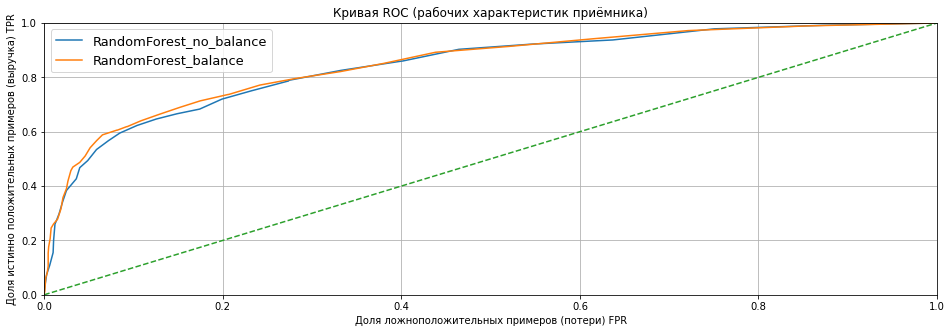

In [80]:
plt.figure(figsize=(16,5))
#plt.plot(fpr_tree, tpr_tree, label="Tree_balance")
plt.plot(fpr_Rtree, tpr_Rtree, label="RandomForest_no_balance")
plt.plot(fpr_Rtree_, tpr_Rtree_, label="RandomForest_balance")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Кривая ROC (рабочих характеристик приёмника)")
plt.ylabel("Доля истинно положительных примеров (выручка) TPR")
plt.xlabel("Доля ложноположительных примеров (потери) FPR")
plt.legend(fontsize = 13)
plt.grid()
plt.show()

На графике кривая двух моделей отличается не очень сильно. Из графика видно что в модели RandomFores показатель auc_roc (площадь под кривой) лучше.

### Построение модели "Логистическая регрессия"

In [81]:
%%time
model_log_no_balance = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_log_no_balance.fit(features_train, target_train)

CPU times: user 107 ms, sys: 2.87 ms, total: 109 ms
Wall time: 58.3 ms


LogisticRegression(max_iter=1000, random_state=12345)

In [82]:
predictions = model_log_no_balance.predict(features_test)
result = f1_score(target_test, predictions)
result

0.3466257668711657

In [83]:
probabilities = (model_log_no_balance.predict_proba(features_test)[:,1])
fpr_lg, tpr_lg, thresholds = roc_curve(target_test, probabilities)
auc_roc = roc_auc_score(target_test, probabilities)
auc_roc

0.7797995177369855

Метрика f1_score при несбалансированной выборке получилась равна 0.34, намного хуже чем у предыдущих моделей. 

Посмотрим на сбалансированную выборку. Выборку сбалансирую с помощью class_weight='balanced' 

In [84]:
%%time
model_log_bl = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000, class_weight='balanced')
model_log_bl.fit(features_train, target_train)

CPU times: user 84.7 ms, sys: 2.64 ms, total: 87.4 ms
Wall time: 45.2 ms


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=12345)

In [85]:
predictions = model_log_bl.predict(features_test)
result = f1_score(target_test, predictions)
result

0.5037481259370316

In [86]:
probabilities = (model_log_bl.predict_proba(features_test)[:,1])
fpr_lg_, tpr_lg_, thresholds = roc_curve(target_test, probabilities)
auc_roc = roc_auc_score(target_test, probabilities)
auc_roc

0.7806489582737652

С помощью upsampled мы получили лучший показатель f1 равный 0.50 (почти в 1.5 раза лучше) а auc_roc равный 0.77. Самый плохой показатель.

По показателю f1 модель не дотягивает до требований. Попробуем обучить модель на features_train_upsampled, target_train_upsampled

In [87]:
%%time
model_log_upsampled = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_log_upsampled.fit(features_train_upsampled, target_train_upsampled)

CPU times: user 141 ms, sys: 6 ms, total: 147 ms
Wall time: 74.5 ms


LogisticRegression(max_iter=1000, random_state=12345)

In [88]:
predictions = model_log_upsampled.predict(features_test)
result = f1_score(target_test, predictions)
result

0.5025868440502588

In [89]:
probabilities = (model_log_upsampled.predict_proba(features_test)[:,1])
fpr_lg, tpr_lg, thresholds = roc_curve(target_test, probabilities)
auc_roc = roc_auc_score(target_test, probabilities)
auc_roc

0.7806918472770247

По показателю f1 модель не дотягивает до требований. Но нет разницы как балансировать классы upsampled или class_weight='balanced'

Построим ROC кривые для трех моделей

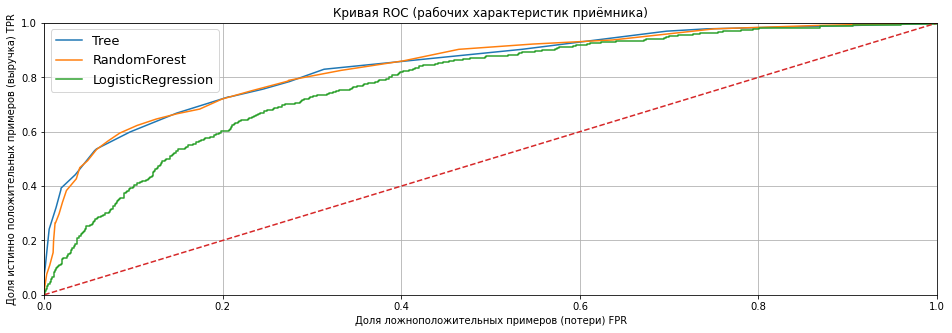

In [90]:
plt.figure(figsize=(16,5))
plt.plot(fpr_tree, tpr_tree, label="Tree")
plt.plot(fpr_Rtree, tpr_Rtree, label="RandomForest")
plt.plot(fpr_lg, tpr_lg, label="LogisticRegression")
plt.title("Кривая ROC (рабочих характеристик приёмника)")
plt.ylabel("Доля истинно положительных примеров (выручка) TPR")
plt.xlabel("Доля ложноположительных примеров (потери) FPR")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(fontsize = 13)
plt.grid()
plt.show()

Здесь кривая хуже чем, у двух предыдущих моделей, следовательно и показатель auc_roc тоже будет одним из самых плохих

## Вывод

1. Проанализировав данные мы пришли к выводу что:

    Больше всего клиентов уходит в первый год более 23 процентов, потом идет на спад, но со второго по третий год  наблюдается рост.
    
    Больше всего клиентов уходит из Германии на втором месте Испания, и на третьем Франция.
    
    Самому молодому клиенту - 18 лет, самом пожилому клиенту 92. Чем больше возраст клиента, тем чаще они уходят из банка.
    
    Если на счете до 110138.926 то клиенты уходят, начиная с суммы 133710.358 и больше количество  ушедших клиентов уменьшается.
    
    Больше всего клиентов пользуется одним или двумя продуктами, тем кто пользуется одним продуктом уходят в четыре раза чаще, чем те кто пользуется двумя, те кто пользуется 3 продуктами 80 процентов из них уходя, те кто 4 все 100.
    
    Количество клиентов используемых кредитную карту почти в два раза больше чем те кто ей не пользуется. Клиенты уходят одинаково, вне зависимости от того имеет он кредитную карту, что нет.
    
    Неактивные клиенты уходят в два раза чаще чем активные.
    
    Уход клиента слабо зависит от  предполагаемой зарплаты 

2. Построили три модели "Tree", "RandomForest", "LogisticRegression" и пришли к выводу:

    по показателю f1 и показателю auc_roc лучше всего себя показала модель **RandomForest** (на сбалансированной модели f1=0.62, auc_roc=0.77  против модели **Tree** у которой f1=0.60, auc_roc=0.76  и модели **LogisticRegressionу** у которой f1=0.50, auc_roc=0.67.
    
    модели показывают по показателю f1 показывают лучший результат на сбалансированных данных. Так на модели **RandomForest**  после выбора оптимального predict f1 повысился с 0.57 до 0.62, auc_roc уменьшился с 0.85 до 0.77.
    
      Если данные несбалансированны, то нам трудно найти точку где FPR(потери) стали минимальным при самом возможном высоком FPR - нам нужна точка излома графика, а на несбалансированных данных ее удивить и определить трудно. На сбалансированных данных auc_roc (показатель который определяет способность модели различать классы - площадь под кривой) меньше чем на несбалансированных. Необходимо выбирать чем жертвовать или показателем f1 что мало вероятно или показателем auc_roc.
      
     По процессу обучения дольше всех обучатся модель RandomForest, дальше Tree и наименьше всего LogisticRegression. Если выбирать между количеством задействованных ресурсов, и количеством предсказания модели по метрики f1 то я бы выбрал для обучения модель Tree (время обучения - 4.59 сек, f1=0.60 у модели RandomForest f1 хоть и лучше и равен 0.60, в тоже время время обучения заняло 1 мин 8 сек.)